### What is Feature Scaling?
Feature Scaling is a method to scale numeric feature in the same scale or range (like:-1 to 1, 0 to 1).
<br>This last step involved in Data Preprocessing and before ML Model training.
<br>It is also called data normalization
<br>We apply feature scaling om independent variable.

### Why Feature Scaling?
The Scale of raw feature is different according to its units.
<br>Machine learning algorithms can not understand feature units,understand only number
<b><br>Ex: if hight 140cm and 8.2feet</b>
    <br>Types Of Scaler 
    <br>Min Max Scaler, Standard Scaler, Max Abs Scaler etc

### What is Normalization?
<li>Normalization rescale the feature in fixed range b/w 0 and 1.
    <br><li>Normalization also calles as Min-Max Scalling.
        <br><li>If data doesn't follow normal distribution(Gussian Distribution).

### Standardization Vs Normalization ?
<li>There is no any thumb rule to use Standardization or Normalization for Special Ml algo.
<br><li>But mostly Standaridization use clustring analysis,Princpal Component Analysis(PCA). 
    <br><li>Normalization prefer for image processing because pixel intensity b/w 0 to 255,neural network algorith require in scale 0-1,K-Nearest Neighbors.

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df2=df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [6]:
#checking to see if there's any null variables
df2.isnull().sum()

survived      0
pclass        0
age         177
parch         0
dtype: int64

In [7]:
df3=df2.fillna(df2.mean())

In [8]:
X=df3.drop('survived',axis=1)
Y=df3['survived']

In [9]:
#Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
# Standard Scaler
sc=StandardScaler()
sc.fit(X_train )

StandardScaler()

In [11]:
sc.mean_

array([ 2.33005618, 29.53822538,  0.37921348])

In [12]:
sc.scale_

array([ 0.82400502, 12.98541943,  0.79111317])

In [13]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.330056,29.538225,0.379213
std,0.824584,12.994548,0.791669
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [14]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [15]:
X_train_sc

array([[-1.61413602,  1.22920747, -0.47934164],
       [-0.40055118, -0.50350514, -0.47934164],
       [ 0.81303367,  0.18957991, -0.47934164],
       ...,
       [ 0.81303367,  0.88266495, -0.47934164],
       [-1.61413602, -1.19659018,  2.04874166],
       [-1.61413602, -0.65752403,  0.78470001]])

In [16]:
X_train_sc=pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc=X_train_sc=pd.DataFrame(X_test_sc,columns=['pclass','age','parch'])

In [17]:
X_test_sc.head()

,pclass,age,parch
0,0.813034,0.012390,0.784700
1,-0.400551,0.112570,-0.479342
2,0.813034,-0.734533,-0.479342
3,-0.400551,-1.812666,0.784700
4,0.813034,-1.196590,-0.479342


In [18]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,-0.13,0.06,0.01
std,1.06,1.00,1.09
min,-1.61,-2.21,-0.48
25%,-1.61,-0.58,-0.48
50%,0.81,0.01,-0.48
75%,0.81,0.50,-0.48
max,0.81,3.19,5.84


In [19]:
# Min Max Scaler
mmc=MinMaxScaler()
mmc.fit(X_train )

MinMaxScaler()

In [20]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [21]:
X_train_mmc=pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc=X_train_sc=pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [22]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.61,0.38,0.07
std,0.44,0.16,0.14
min,0.00,0.01,0.00
25%,0.00,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.45,0.00
max,1.00,0.89,0.83


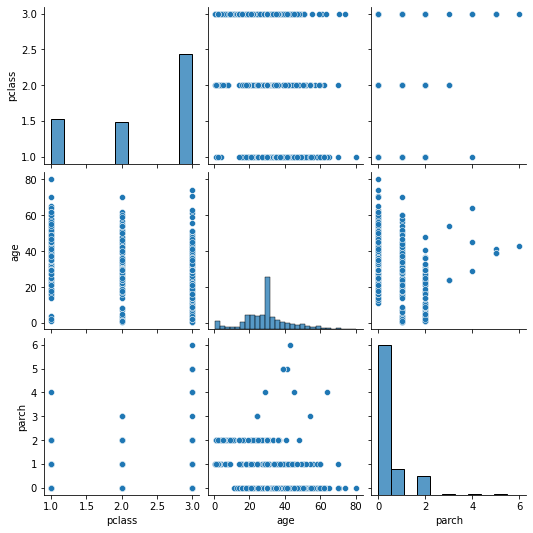

In [23]:
sns.pairplot(X_train)

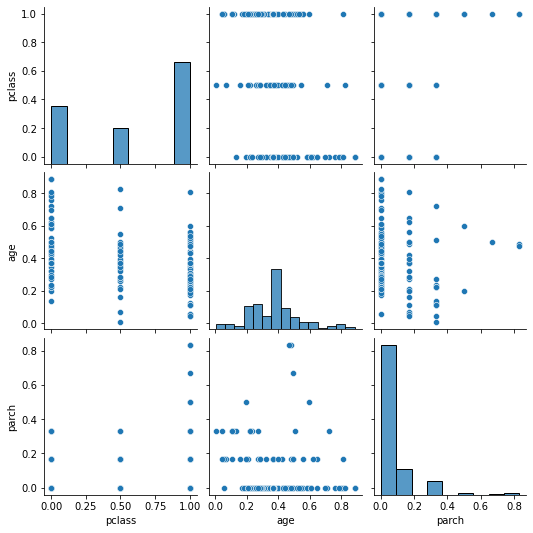

In [24]:
sns.pairplot(X_train_sc)